In [1]:
import numpy as np
import matplotlib.pyplot as plt
from catvsmonsters import catVsMonsters
from grid_world import GridWorld

In [2]:
import time
from tqdm import tqdm
class Node:
    def __init__(self, state, parent=None):
        self.state = state
        self.parent = parent
        self.children = []
        self.visits = 0
        self.value = 0.0

class MonteCarloSearchTree:
    def __init__(self, env):
        self.env = env
        self.root = Node((0,0))
        self.depth_limit = 200
        self.c = 2
        self.gamma = 0.9

    def _selection(self, node):
        while len(node.children) > 0:
            ucb_values = [self._ucb(child, node.visits) for child in node.children]
            node = node.children[np.argmax(ucb_values)]
        return node

    def _ucb(self, child, parent_visits):
        if child.visits == 0:
            return float('inf')
        exploitation = child.value / child.visits
        exploration = self.c * np.sqrt(np.log(parent_visits) / child.visits)
        return exploitation + exploration

    def _expansion(self, node):
        for action in self.env.actions:
            next_state = self.env.get_next_state(node.state, action)
            child = Node(next_state, parent=node)
            node.children.append(child)
        return node

    def _simulation(self, node):
        # Save the original state
        original_state = self.env.current_state
        
        # Set environment to node's state
        self.env.current_state = node.state
        current_state = node.state
        total_reward = 0
        depth = 0
        
        while current_state not in [self.env.goal] and depth < self.depth_limit:
            action = np.random.choice(self.env.actions)
            next_state, reward, done = self.env.step(action)
            total_reward += (self.gamma ** depth) * reward
            current_state = next_state
            depth += 1
            if done:
                break
        
        # Restore the original state
        self.env.current_state = original_state
        return total_reward

    def _backpropagation(self, node, reward):
        while node is not None:
            node.visits += 1
            # Update to use average values instead of cumulative
            node.value = (node.value * (node.visits - 1) + reward) / node.visits
            reward = reward * self.gamma
            node = node.parent

    def get_best_action(self, iterations,min_visits=1):
        iteration_count = 0
        visits_completed= False

        for _ in range(iterations):
            leaf = self._selection(self.root)
            if leaf.state == self.env.goal:
                self._backpropagation(leaf, 0)
                continue
            if leaf.visits == 0:
                leaf = self._expansion(leaf)
            simulation_result = self._simulation(leaf)
            self._backpropagation(leaf, simulation_result)
        
        # Calculate values for each action
        values = []
        for action in self.env.actions:
            next_state = self.env.get_next_state(self.root.state, action)
            for child in self.root.children:
                
                if child.state == next_state:
                    values.append(child.value)
                    break
        return np.exp(values)/np.sum(np.exp(values)), max(values)


 20%|██        | 1/5 [00:00<00:01,  2.05it/s]

budget: 500, optimal_value: -3.2587654959592856, optimal_action: 3


 60%|██████    | 3/5 [00:01<00:00,  2.06it/s]

budget: 500, optimal_value: -2.41223092694093, optimal_action: 0
budget: 500, optimal_value: -2.9837404050961265, optimal_action: 1


 80%|████████  | 4/5 [00:01<00:00,  2.14it/s]

budget: 500, optimal_value: -2.887756553630211, optimal_action: 0


100%|██████████| 5/5 [00:02<00:00,  2.13it/s]


budget: 500, optimal_value: -3.354269234458841, optimal_action: 1


 20%|██        | 1/5 [00:00<00:03,  1.03it/s]

budget: 1000, optimal_value: -2.3778538209742166, optimal_action: 0


 40%|████      | 2/5 [00:01<00:02,  1.07it/s]

budget: 1000, optimal_value: -2.3459325531159094, optimal_action: 0


 60%|██████    | 3/5 [00:02<00:01,  1.10it/s]

budget: 1000, optimal_value: -2.615191639407085, optimal_action: 1


 80%|████████  | 4/5 [00:03<00:00,  1.06it/s]

budget: 1000, optimal_value: -2.952014484334338, optimal_action: 3


100%|██████████| 5/5 [00:04<00:00,  1.05it/s]


budget: 1000, optimal_value: -2.7094019617280223, optimal_action: 1


 20%|██        | 1/5 [00:08<00:32,  8.07s/it]

budget: 10000, optimal_value: -2.122848305817641, optimal_action: 3


 40%|████      | 2/5 [00:16<00:24,  8.30s/it]

budget: 10000, optimal_value: -1.6924957342587341, optimal_action: 3


 60%|██████    | 3/5 [00:24<00:16,  8.09s/it]

budget: 10000, optimal_value: -1.7005798413999995, optimal_action: 3


 80%|████████  | 4/5 [00:31<00:07,  7.85s/it]

budget: 10000, optimal_value: -1.9717335399337124, optimal_action: 3


100%|██████████| 5/5 [00:39<00:00,  7.87s/it]


budget: 10000, optimal_value: -2.0442268646922948, optimal_action: 0


 20%|██        | 1/5 [01:18<05:15, 78.86s/it]

budget: 100000, optimal_value: -1.4428611733145484, optimal_action: 1


 40%|████      | 2/5 [02:32<03:47, 75.81s/it]

budget: 100000, optimal_value: -1.331661480886544, optimal_action: 3


 60%|██████    | 3/5 [03:49<02:32, 76.14s/it]

budget: 100000, optimal_value: -1.56405973167668, optimal_action: 3


 80%|████████  | 4/5 [05:07<01:17, 77.18s/it]

budget: 100000, optimal_value: -1.2759916325044622, optimal_action: 3


100%|██████████| 5/5 [06:27<00:00, 77.58s/it]

budget: 100000, optimal_value: -1.4877523914761293, optimal_action: 3


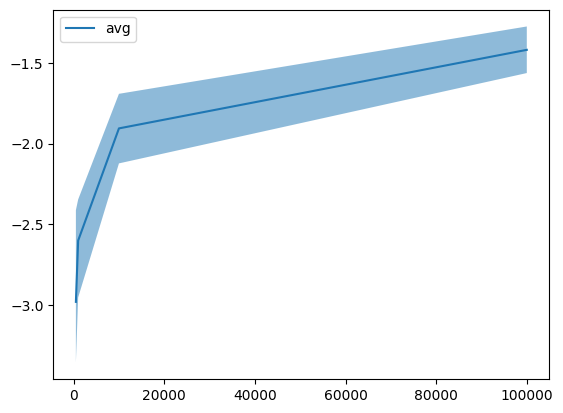

In [3]:
def plot_graph_for_test(env,min_visits=1000):
    mcts = MonteCarloSearchTree(env)
    mins={}
    maxs={}
    avgs={}
    budget=[500,1000,10000,100000]
    probs_pi_dict={}
    # time_slots=[1,5,10,50,100]
    for b in budget:
        min_value = float('inf')
        max_value = float('-inf')
        avg_value = 0
        avg_iteration = 0
        avg_pi=None
        for i in tqdm(range(5)):
            env.reset()
            mcts.root = Node((0,0))
            probs_pi,optimal_value = mcts.get_best_action(b,min_visits=min_visits)
            optimal_action = np.argmax(probs_pi)
            print(f'budget: {b}, optimal_value: {optimal_value}, optimal_action: {optimal_action}')
            min_value = min(min_value, optimal_value)
            max_value = max(max_value, optimal_value)
            avg_value += optimal_value
            if avg_pi is None:
                avg_pi = probs_pi
            else:
                avg_pi += probs_pi
        avg_pi /= 5
        probs_pi_dict[b] = avg_pi/5
        avg_value /= 5

        mins[b] = min_value
        maxs[b] = max_value
        avgs[b] = avg_value
    
    return mins,maxs,avgs,budget


cat_dynamics = catVsMonsters()
# cat_dynamics.current_state = (0,4)
mins_cat,maxs_cat, avgs_cat, iterations_cat = plot_graph_for_test(cat_dynamics,min_visits=1)

import matplotlib.pyplot as plt
# plot with time slots
#  and range  in lighter blue and avg in darker blue
x_values = [500,1000,10000,100000]
y_values =list(avgs_cat.values())
plt.plot(x_values,y_values,label='avg')
plt.fill_between(x_values,list(mins_cat.values()),list(maxs_cat.values()),alpha=0.5)
plt.legend()
# plt.xscale('log')
plt.show()


In [4]:
from tqdm import tqdm

env_cat = catVsMonsters()
mcts_cat = MonteCarloSearchTree(env_cat)
probs_pi_cat={}
pi_cat={}
pi_cat_second={}
for k in tqdm(range(25),desc='outer loop'):
    i = k // 5
    j = k % 5
    action_count = [0,0,0,0]
    for p in tqdm(range(10),desc='inner loop'):
        if (i,j) not in env_cat.furniture and (i,j) != env_cat.goal:
            env_cat.current_state = (i,j)
            mcts_cat.root = Node((i,j))
            probs_pi_cat[(i,j)],optimal_value= mcts_cat.get_best_action(10000,min_visits=2000)
            optimal_action = np.argmax(probs_pi_cat[(i,j)])
            action_count[optimal_action] += 1
    if (i,j) not in env_cat.furniture and (i,j) != env_cat.goal:
        pi_cat[(i,j)] = action_count.index(max(action_count))
        print()
        print(f'state: {(i,j)}, action_count: {action_count}, pi_cat[(i,j)]: {pi_cat[(i,j)]}')
        print(f'--------------------------------')


outer loop:   4%|▍         | 1/25 [01:25<34:19, 85.81s/it]


state: (0, 0), action_count: [1, 5, 0, 4], pi_cat[(i,j)]: 1
--------------------------------


outer loop:   8%|▊         | 2/25 [02:57<34:08, 89.07s/it]


state: (0, 1), action_count: [3, 3, 0, 4], pi_cat[(i,j)]: 3
--------------------------------


outer loop:  12%|█▏        | 3/25 [04:17<31:12, 85.12s/it]


state: (0, 2), action_count: [1, 3, 5, 1], pi_cat[(i,j)]: 2
--------------------------------


In [ ]:
def print_policy(policy):
    for i in range(5):
        for j in range(5):
            state = (i, j)
            if state == env_cat.goal:
                print("G", end=" ")
                continue
            elif state in env_cat.furniture:
                print("F", end=" ")
                continue
            action = policy[state]
            if action == 0:
                print("↑", end=" ")
            elif action == 1:
                print("↓", end=" ")
            elif action == 2:
                print("←", end=" ")
            elif action == 3:
                print("→", end=" ")
            else:
                print(" ", end=" ")
        print()

print_policy(pi_cat)
# print_policy(pi_cat_second)

In [ ]:
import matplotlib.pyplot as plt
# plot with time slots
#  and range  in lighter blue and avg in darker blue
x_values = [10,50,100,500,1000,10000,100000]
grid_world = GridWorld()
mins_grid,maxs_grid, avgs_grid, budget_grid = plot_graph_for_test(grid_world)
y_values =list(avgs_grid.values())
plt.plot(x_values,y_values,label='avg')
plt.fill_between(x_values,list(mins_grid.values()),list(maxs_grid.values()),alpha=0.5)
plt.legend()
plt.xscale('log')
plt.show()


In [ ]:
from tqdm import tqdm
env = GridWorld()
mcts = MonteCarloSearchTree(env)
probs_pi={}
pi={}
for k in tqdm(range(25)):
    i = k // 5
    j = k % 5
    action_count = [0,0,0,0]
    for p in range(5):
        if (i,j) not in env.obstacles and (i,j) != env.goal:
            env.current_state = (i,j)
            mcts.root = Node((i,j))
            probs_pi[(i,j)],optimal_value,optimal_action = mcts.get_best_action(20000)
            print(f'state: {(i,j)}, optimal_value: {optimal_value}, optimal_action: {optimal_action}')
            action_count[optimal_action] += 1
    if (i,j) not in env.obstacles and (i,j) != env.goal:
        pi[(i,j)] = action_count.index(max(action_count))

    

In [ ]:
def print_policy_grid(policy):
    for i in range(5):
        for j in range(5):
            state = (i, j)
            if state == env.goal:
                print("G", end=" ")
                continue
            elif state in env.obstacles:
                print("O", end=" ")
                continue
            action = policy[state]
            if action == 0:
                print("↑", end=" ")
            elif action == 1:
                print("↓", end=" ")
            elif action == 2:
                print("←", end=" ")
            elif action == 3:
                print("→", end=" ")
            else:
                print(" ", end=" ")
        print()

print_policy(pi)

In [ ]:
def get_greedy_policy(probs_pi):
    policy = {}
    for state in probs_pi:
        if state not in env.obstacles and state != env.goal:
            policy[state] = np.argmax(probs_pi[state])
    return policy
print(probs_pi)
print_policy_grid(get_greedy_policy(probs_pi))
